In [1]:
import iris
import matplotlib.pyplot as plt

from ds_module import *

##### Loading the two maps. 

In [2]:
#Load high resolution dataset (ERA5 reanalysis)
D1=iris.load_cube('data/MSLP_ERA5_1950_2014_mean_30km.nc')
print(D1)

mslp / (hPa)                        (latitude: 721; longitude: 1440)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar coordinates:
        time                        1982-06-17 00:00:00, bound=(1950-01-01 00:00:00, 2014-12-01 00:00:00)
    Cell methods:
        0                           time: mean
    Attributes:
        CDI                         'Climate Data Interface version 2.2.1 (https://mpimet.mpg.de/cdi)'
        CDO                         'Climate Data Operators version 2.2.0 (https://mpimet.mpg.de/cdo)'
        Conventions                 'CF-1.7'
        comment                     'Sea Level Pressure'
        history                     'Thu Mar 07 13:30:29 2024: cdo sellonlatbox,0,360,-90,90 MSLP_ERA5_1950_2022_monthly.nc ...'
        institution                 'European Centre for Medium-Range Weather Forecasts'
        source                      'ECMW

/home/llvillanueva/miniconda3/envs/ESP/lib/python3.12/site-packages/iris/__init__.py:354: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  cubes = _load_collection(uris, constraints, callback).cubes()


In [3]:
#Load lower resolution dataset (UKESM model outputs)
D2=iris.load_cube('data/MSLP_UKESM_1950_2014_mean_100km.nc')
print (D2)

mslp / (hPa)                        (latitude: 144; longitude: 192)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar coordinates:
        forecast_reference_time     1850-01-01 00:00:00
        time                        1982-07-01 00:00:00, bound=(1950-01-01 00:00:00, 2015-01-01 00:00:00)
    Attributes:
        Conventions                 'CF-1.5'


##### Looking on the resolution of the two maps, we can see that they have different resolution and performing operation will be problematic. **Solution:** re-gridding!

In [4]:
print (D1.coords('latitude'))
print (D2.coords('latitude'))

[<DimCoord: latitude / (degrees)  [-90. , -89.75, ..., 89.75, 90. ]  shape(721,)>]
[<DimCoord: latitude / (degrees)  [-89.375, -88.125, ..., 88.125, 89.375]  shape(144,)>]


##### Visualization of the two maps. We can visible see the their difference in resolution.

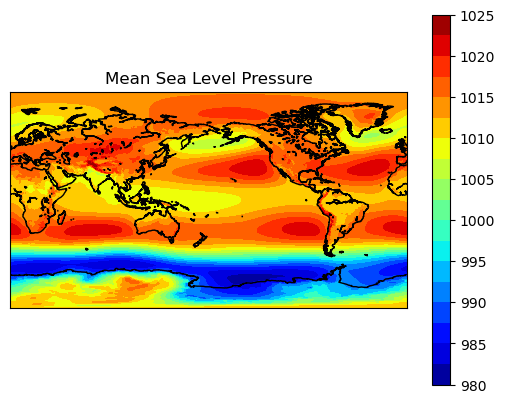

In [5]:
create_map(D1, title ='Mean Sea Level Pressure')

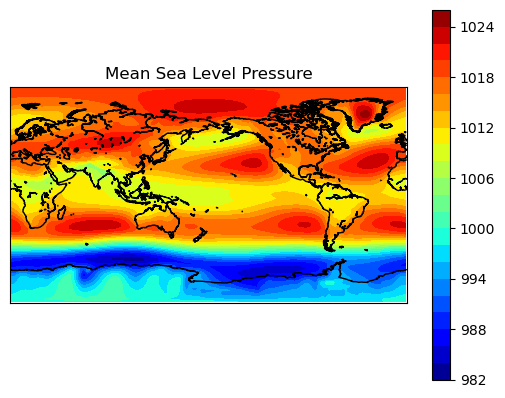

In [6]:
create_map(D2, title ='Mean Sea Level Pressure')

##### Performing some re-gridding. In this case, we want to make the coarser map into more high resolution map (Linear)

In [7]:
D2_hireso = regrid(D2, D1, binary=True)

##### Let us have a look at the latitude coordinate. Now, we can see that both maps have the same resolution after re-gridding. 

Map 1 resolution details:

In [8]:
print (D1.coords('latitude'))

[<DimCoord: latitude / (degrees)  [-90. , -89.75, ..., 89.75, 90. ]  shape(721,)>]


Map 2 re-gridded and we can see the updated resolution details:

In [9]:
print (D2_hireso.coords('latitude'))

[<DimCoord: latitude / (degrees)  [-90. , -89.75, ..., 89.75, 90. ]  shape(721,)>]


Visualizing the new re-gridded map.

Re-gridded map


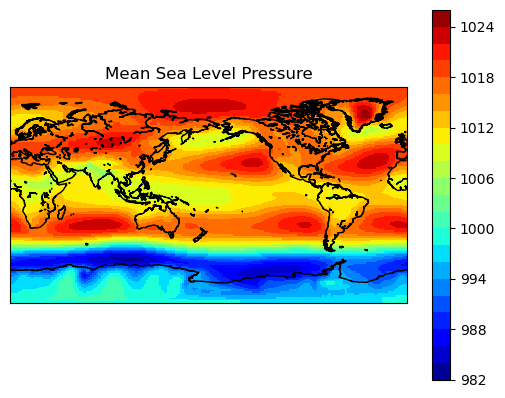

In [10]:
print('Re-gridded map')
create_map(D2_hireso, title ='Mean Sea Level Pressure')

In [11]:
anomaly_map = D1 - D2_hireso

Anomaly map


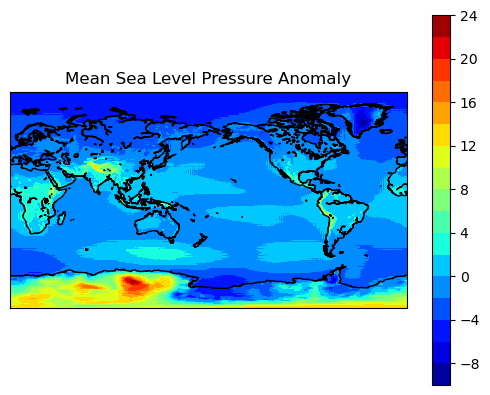

In [12]:
print('Anomaly map')
create_map(anomaly_map, title ='Mean Sea Level Pressure Anomaly')

In [13]:
lat = [41.9, 37.8, -16.5, -33.86]
lon = [12.5, 122.4, 68.12, 151.20]

In [14]:
interpolationM(anomaly_map, lat, lon)

41.9 12.5 -2.5204957
37.8 122.4 -1.1627905
-16.5 68.12 -1.1285669
-33.86 151.2 -0.81459033


In [15]:
interpolationM(anomaly_map, lat, lon, Linear = False)

41.9 12.5 -2.5028687
37.8 122.4 -1.1621094
-16.5 68.12 -1.1248169
-33.86 151.2 -0.82092285


##### Performing some re-gridding. In this case, we want to make the coarser (Nearest Neigbhor)

In [16]:
D2_hireso2 = regrid(D2, D1, binary=False)

Re-gridded map


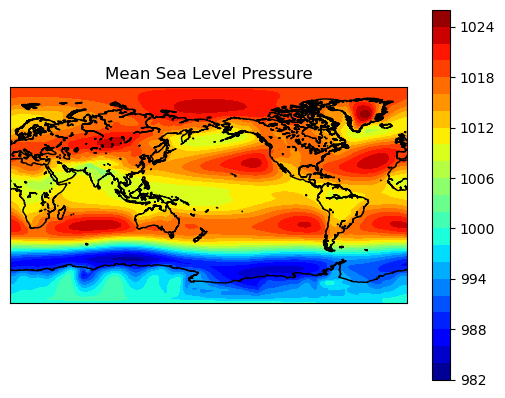

In [18]:
print('Re-gridded map')
create_map(D2_hireso2, title ='Mean Sea Level Pressure')

In [21]:
anomaly_map2 = D1 - D2_hireso2

Anomaly map


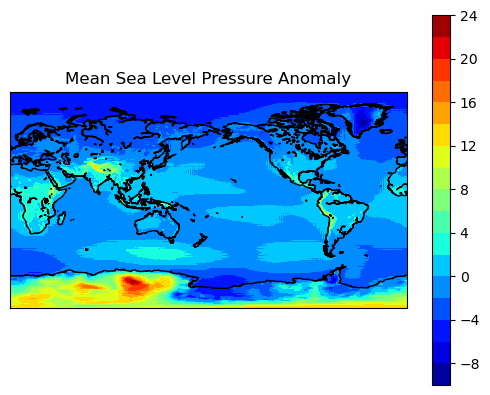

In [22]:
print('Anomaly map')
create_map(anomaly_map, title ='Mean Sea Level Pressure Anomaly')

In [25]:
interpolationM(anomaly_map2, lat, lon, Linear = True)

41.9 12.5 -2.529602
37.8 122.4 -1.1744214
-16.5 68.12 -0.90249515
-33.86 151.2 -0.83258057


In [26]:
interpolationM(anomaly_map2, lat, lon, Linear = False)

41.9 12.5 -2.522522
37.8 122.4 -1.163147
-16.5 68.12 -0.89733887
-33.86 151.2 -0.8447876
